## Stack - Projeto Human Resources Analytics

### Machine Learning.

In [2]:
!pip install minio

  Using cached minio-7.1.3-py3-none-any.whl (75 kB)


In [3]:
import pandas as pd
import datetime
import glob
from minio import Minio
import numpy as np
import matplotlib.pyplot as plt

In [4]:
client = Minio(
        "localhost:9000",
        access_key="minioadmin",
        secret_key="minioadmin",
        secure=False
    )

### Baixando o Dataset do Data Lake.

In [5]:
!pip install parquet

  Using cached parquet-1.3.1-py3-none-any.whl (24 kB)
  Using cached thriftpy2-0.4.14.tar.gz (361 kB)
  Using cached ply-3.11-py2.py3-none-any.whl (49 kB)
  Created wheel for thriftpy2: filename=thriftpy2-0.4.14-py2.py3-none-any.whl size=321001 sha256=30fda1123c3e09b6ecfe22104983c4782d6017a9aaeb0c61f11246a02ebc67b8
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\eb\a5\fa\60bfe53464bb7eb85b1153e0469f3cc177d522ddf7ff4fc1c8
Successfully built thriftpy2


In [6]:
!pip install pyarrow
!pip install fastparquet

  Using cached fsspec-2022.1.0-py3-none-any.whl (133 kB)


In [7]:
client.fget_object(
            "processing",
            "employees_dataset.parquet",
            "temp_.parquet",
)
df = pd.read_parquet("temp_.parquet")

In [8]:
df.head()

,department,salary,left,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident
0,sales,low,1.0,266.000000,2.0,38.0,53.0,3.0,0.0
1,sales,medium,1.0,252.000000,5.0,80.0,86.0,6.0,0.0
2,sales,medium,1.0,289.666667,7.0,11.0,88.0,4.0,0.0
3,sales,low,1.0,275.666667,5.0,72.0,87.0,5.0,0.0
4,sales,low,1.0,292.333333,2.0,37.0,52.0,3.0,0.0


#### Organizando o dataset.

In [9]:
df = df[['department', 'salary', 'mean_work_last_3_months',
       'number_projects', 'satisfaction_level', 'last_evaluation',
       'time_in_company', 'work_accident','left']]

In [10]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0


#### Verificando os registros missing.

In [11]:
df.isnull().sum()

department                 1
salary                     1
mean_work_last_3_months    0
number_projects            1
satisfaction_level         1
last_evaluation            1
time_in_company            1
work_accident              1
left                       1
dtype: int64

In [16]:
df[df.notnull()]

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
14995,technical,low,253.333333,2.0,37.0,48.0,3.0,0.0,1.0
14996,technical,medium,288.000000,2.0,37.0,53.0,3.0,0.0,1.0
14997,support,low,272.000000,6.0,11.0,96.0,4.0,0.0,1.0
14998,support,low,276.666667,2.0,37.0,52.0,3.0,0.0,1.0


In [12]:
df = df[:14998]

#### Alterando os tipos de dados.

In [13]:
df["number_projects"] = df["number_projects"].astype(int)
df["mean_work_last_3_months"] = df["mean_work_last_3_months"].astype(int)
df["time_in_company"] = df["time_in_company"].astype(int)
df["work_accident"] = df["work_accident"].astype(int)
df["left"] = df["left"].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   department               14998 non-null  object 
 1   salary                   14998 non-null  object 
 2   mean_work_last_3_months  14998 non-null  int32  
 3   number_projects          14998 non-null  int32  
 4   satisfaction_level       14998 non-null  float64
 5   last_evaluation          14998 non-null  float64
 6   time_in_company          14998 non-null  int32  
 7   work_accident            14998 non-null  int32  
 8   left                     14998 non-null  int32  
dtypes: float64(2), int32(5), object(2)
memory usage: 761.7+ KB


In [20]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


In [14]:
df = df[:14998]

#### Renomeando atributos

In [15]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_projects': 'projectCount',
                        'mean_work_last_3_months': 'averageMonthlyHours',
                        'time_in_company': 'yearsAtCompany',
                        'work_accident': 'workAccident',
                        'left' : 'turnover'
                        })

In [23]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


###  Importancia de Features

#### Converte os atributos categoricos valores numéricos.

In [16]:
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

In [25]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,7,1,266,2,38.0,53.0,3,0,1
1,7,2,252,5,80.0,86.0,6,0,1
2,7,2,289,7,11.0,88.0,4,0,1
3,7,1,275,5,72.0,87.0,5,0,1
4,7,1,292,2,37.0,52.0,3,0,1


#### Separando os conjuntos de dados.

In [17]:
target_name = 'turnover'
X = df.drop('turnover', axis=1)
y = df[target_name]

#### Transformando os dados.

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
X = scaler.fit_transform(X)

In [21]:
X

array([[0.77777778, 0.5       , 0.38202247, ..., 0.265625  , 0.125     ,
        0.        ],
       [0.77777778, 1.        , 0.2247191 , ..., 0.78125   , 0.5       ,
        0.        ],
       [0.77777778, 1.        , 0.64044944, ..., 0.8125    , 0.25      ,
        0.        ],
       ...,
       [1.        , 0.5       , 0.23595506, ..., 0.1875    , 0.125     ,
        0.        ],
       [1.        , 1.        , 0.62921348, ..., 0.265625  , 0.125     ,
        0.        ],
       [0.88888889, 0.5       , 0.4494382 , ..., 0.9375    , 0.25      ,
        0.        ]])

#### Separando os conjuntos.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

#### Treinando o algoritmo de arvore de decisão.

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

In [26]:
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns

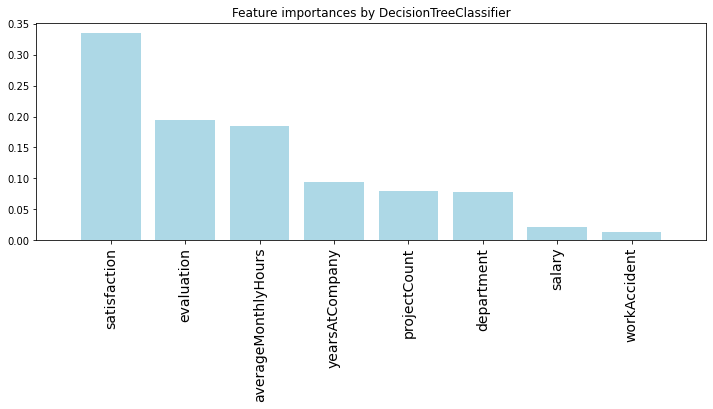

In [27]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

#### Filtrando apenas os atributos relevantes.

In [28]:
X = df[["satisfaction","evaluation","averageMonthlyHours","yearsAtCompany"]]

#### Separando os conjuntos de dados.

In [29]:
scaler = MinMaxScaler()

In [30]:
X = scaler.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

In [32]:
X_train

array([[0.59340659, 0.21875   , 0.40449438, 0.125     ],
       [0.        , 0.703125  , 0.41573034, 0.25      ],
       [0.3956044 , 0.28125   , 0.58426966, 0.125     ],
       ...,
       [0.32967033, 0.3125    , 0.59550562, 0.125     ],
       [0.92307692, 0.28125   , 0.46067416, 0.        ],
       [0.51648352, 0.5       , 0.53932584, 0.125     ]])

#### Função do modelo de base.

In [33]:
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

#### Importando métodos de métrica de avaliação.

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [35]:
def accuracy_result(y_test,y_predict):
    acc = accuracy_score(y_test, y_predict)
    print ("Accuracy = %2.2f" % acc)

In [36]:
def roc_classification_report_results(model,y_test,y_predict):
    roc_ = roc_auc_score(y_test, y_predict)
    classfication_report = classification_report(y_test, y_predict)
    
    print ("\n{} AUC = {}\n".format(model, roc_))
    print(classfication_report)

#### Análise do modelo de baseline

In [37]:
y_predict = base_rate_model(X_test)

In [38]:
accuracy_result(y_test, y_predict)

Accuracy = 0.76


In [39]:
roc_classification_report_results("Base Model", y_test, y_predict)


Base Model AUC = 0.5

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2286
           1       0.00      0.00      0.00       714

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



C:\Users\User\anaconda3\envs\pedro\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Modelo de Regressão Logística.

#### Instânciando o algoritmo.

In [40]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#### Realizando o treinamento.

In [41]:
logis.fit(X_train, y_train)

LogisticRegression()

#### Calculando as predições.

In [42]:
y_predict = logis.predict(X_test)

#### Avaliando o resultado.

In [43]:
accuracy_result(y_test, y_predict)

Accuracy = 0.77


In [44]:
roc_classification_report_results("Logistic Regression", y_test, y_predict)


Logistic Regression AUC = 0.5406235985207731

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      2286
           1       0.55      0.11      0.18       714

    accuracy                           0.77      3000
   macro avg       0.66      0.54      0.52      3000
weighted avg       0.72      0.77      0.70      3000



### Modelo de Arvore de decisão.

#### Instânciando o algoritmo.

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

#### Realizando o treinamento.

In [46]:
dtree = dtree.fit(X_train,y_train)

#### Calculando as predições.

In [47]:
y_predict = dtree.predict(X_test)

#### Avaliando o resultado.

In [48]:
accuracy_result(y_test, y_predict)

Accuracy = 0.75


In [49]:
roc_classification_report_results("Decision Tree", y_test, y_predict)


Decision Tree AUC = 0.6675452333164237

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2286
           1       0.47      0.51      0.49       714

    accuracy                           0.75      3000
   macro avg       0.66      0.67      0.66      3000
weighted avg       0.76      0.75      0.75      3000



### Modelo de Arvore Aleatória (Random Forest)

#### Instânciando o algoritmo.

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier()

#### Realizando o treinamento.

In [52]:
rf = rf.fit(X_train,y_train)

#### Calculando as predições.

In [53]:
y_predict = rf.predict(X_test)

#### Avaliando o resultado.

In [54]:
accuracy_result(y_test, y_predict)

Accuracy = 0.83


In [55]:
roc_classification_report_results("Random Forest", y_test, y_predict)


Random Forest AUC = 0.724021629649235

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2286
           1       0.69      0.52      0.59       714

    accuracy                           0.83      3000
   macro avg       0.77      0.72      0.74      3000
weighted avg       0.82      0.83      0.82      3000



### Pycaret

#### Importando os métodos.

In [67]:
!pip install pycaret

  Using cached pycaret-2.3.6-py3-none-any.whl (301 kB)
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
  Using cached plotly-5.5.0-py2.py3-none-any.whl (26.5 MB)
  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.5/1.5 MB 3.7 MB/s eta 0:00:00
  Using cached umap-learn-0.5.2.tar.gz (86 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
     -------------------------------------- 121.8/121.8 KB 2.4 MB/s eta 0:00:00
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached kmodes-0.11.1-py2.py3-none-any.whl (19 kB)

  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [316 lines of output]
  Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AIX"' don't match your environment
    Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
    Using cached setuptools-60.7.1-py3-none-any.whl (1.0 MB)
    Using cached Cython-0.29.27-py2.py3-none-any.whl (983 kB)
    Using cached numpy-1.17.3.zip (6.4 MB)
    Preparing metadata (setup.py): started
    Preparing metadata (se


  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
     ---------------------------------------- 25.2/25.2 MB 2.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


    Could not locate executable DF
    customize IntelItaniumVisualFCompiler
    Could not locate executable efl
    customize Gnu95FCompiler
    Could not locate executable gfortran
    Could not locate executable f95
    customize G95FCompiler
    Could not locate executable g95
    customize IntelEM64VisualFCompiler
    customize IntelEM64TFCompiler
    Could not locate executable efort
    Could not locate executable efc
    customize PGroupFlangCompiler
    Could not locate executable flang
    don't know how to compile Fortran code on platform 'nt'
      NOT AVAILABLE
  
    atlas_3_10_blas_threads_info:
    Setting PTATLAS=ATLAS
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries tatlas not found in ['C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\', 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python310\\libs']
      NOT AVAILABLE
  
    atlas_3_10_blas_info:
  

    lapack_info:
    No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
    customize MSVCCompiler
      libraries lapack not found in ['C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\', 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python310\\libs']
      NOT AVAILABLE
  
    C:\Users\User\AppData\Local\Temp\pip-install-ccjhce_8\numpy_4aca21f610b3491487ee9e25b3889ff2\numpy\distutils\system_info.py:1712: UserWarning:
        Lapack (http://www.netlib.org/lapack/) libraries not found.
        Directories to search for the libraries can be specified in the
        numpy/distutils/site.cfg file (section [lapack]) or by setting
        the LAPACK environment variable.
      if getattr(self, '_calc_info_{}'.format(lapack))():
    lapack_src_info:
      NOT AVAILABLE
  
    C:\Users\User\AppData\Local\Temp\pip-install-ccjhce_8\numpy_4aca21f610b3491487ee9e25b3889ff2\numpy\distutils\system_info.py:1712: UserWarning:
       

In [56]:
from pycaret.classification import *

#### Definindo o Setup.

In [57]:
s = setup( df[["satisfaction","evaluation","averageMonthlyHours","yearsAtCompany","turnover"]]
          ,target = "turnover"
          ,numeric_features = ["yearsAtCompany", "averageMonthlyHours"]
          ,normalize = True
          ,normalize_method = "minmax"
          ,data_split_stratify = True
          ,fix_imbalance = True
          ,fold_shuffle=True
          ,imputation_type = 'iterative'
          ,session_id=123
          
         )

,Description,Value
0,session_id,123
1,Target,turnover
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14998, 5)"
5,Missing Values,0
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


#### Comparando diferentes modelos.

In [58]:
best = compare_models(fold =5,sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8258,0.8055,0.6847,0.6221,0.6517,0.5359,0.5371,0.4800
lightgbm,Light Gradient Boosting Machine,0.8437,0.7968,0.6499,0.6796,0.6644,0.5625,0.5628,0.1860
ada,Ada Boost Classifier,0.8013,0.7963,0.6959,0.5677,0.6251,0.4919,0.4967,0.2260
rf,Random Forest Classifier,0.8122,0.7800,0.5586,0.6166,0.5861,0.4651,0.4661,0.5360
knn,K Neighbors Classifier,0.7410,0.7587,0.6859,0.4701,0.5578,0.3836,0.3973,1.1720
qda,Quadratic Discriminant Analysis,0.7219,0.7561,0.7535,0.4498,0.5633,0.3778,0.4049,0.0760
et,Extra Trees Classifier,0.7978,0.7506,0.5142,0.5858,0.5476,0.4181,0.4196,0.5500
nb,Naive Bayes,0.7092,0.7150,0.5878,0.4209,0.4904,0.2947,0.3029,0.0400
lr,Logistic Regression,0.6770,0.6946,0.6311,0.3898,0.4818,0.2658,0.2822,1.9920
lda,Linear Discriminant Analysis,0.6808,0.6937,0.6279,0.3933,0.4835,0.2698,0.2854,0.0560


#### Criando o modelo.

In [59]:
gbc = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8167,0.8071,0.6860,0.6007,0.6405,0.5182,0.5203
1,0.8257,0.8079,0.6960,0.6192,0.6554,0.5393,0.5409
2,0.8224,0.7889,0.6620,0.6187,0.6396,0.5219,0.5225
3,0.8337,0.8126,0.6754,0.6431,0.6588,0.5490,0.5493
4,0.8304,0.8111,0.7040,0.6286,0.6642,0.5512,0.5528
Mean,0.8258,0.8055,0.6847,0.6221,0.6517,0.5359,0.5371
SD,0.0060,0.0086,0.0149,0.0139,0.0099,0.0136,0.0135


#### Realizando o tunning do modelo.

In [60]:
tuned_gbc = tune_model(gbc
                      ,fold = 5
                      ,custom_grid = {
                                      "learning_rate":[0.1,0.2,0.5]
                                     ,"n_estimators":[100,500,1000]
                                     ,"min_samples_split":[1,2,5,10]
                                     ,"max_depth":[1,3,9]
                                     }
                      ,optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8352,0.8018,0.6800,0.6464,0.6628,0.5538,0.5542
1,0.8381,0.8035,0.6840,0.6527,0.6680,0.5610,0.5613
2,0.8324,0.7891,0.6600,0.6445,0.6522,0.5418,0.5418
3,0.8385,0.8096,0.6673,0.6581,0.6627,0.5565,0.5565
4,0.8371,0.8103,0.6880,0.6491,0.6680,0.5601,0.5605
Mean,0.8363,0.8028,0.6759,0.6502,0.6627,0.5547,0.5549
SD,0.0022,0.0077,0.0105,0.0048,0.0058,0.0069,0.0070


#### Finalizando o modelo.

In [61]:
final_model = finalize_model(gbc)

In [62]:
final_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [63]:
save_model(final_model,'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['yearsAtCompany',
                                                           'averageMonthlyHours'],
                                       target='turnover', time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type='...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impuri

#### Transferindo os arquivos para o Data Lake.

#### Modelo de Classificação.

In [64]:
client.fput_object(
    "curated",
    "model.pkl",
    "model.pkl"
)

#### Exportando o conjunto de dados para o disco.

In [65]:
df.to_csv("dataset.csv",index=False)

In [66]:
client.fput_object(
    "curated",
    "dataset.csv",
    "dataset.csv"
)